# Multiple Series

TimeGPT provides a robust solution for multi-series forecasting, which involves analyzing multiple data series concurrently, rather than a single one. The tool can be fine-tuned using a broad collection of series, enabling you to tailor the model to suit your specific needs or tasks.

In [1]:
# | hide
from dotenv import load_dotenv

In [2]:
# | hide
load_dotenv()

True

In [3]:
import pandas as pd
from nixtlats import TimeGPT
import os

In [4]:
timegpt = TimeGPT(token=os.getenv("TIMEGPT_TOKEN"))

In [5]:
# | hide
timegpt = TimeGPT()

You can test the validate of your token calling the `validate_token` method:

In [6]:
timegpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

The following dataset contains prices of different electricity markets. Let see how can we forecast them. The main argument of the forecast method is the input data frame with the historical values of the time series you want to forecast. This data frame can contain information from many time series. Use the `unique_id` column to identify the different time series of your dataset.

In [7]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/electricity-short.csv"
)
df.head()

,unique_id,ds,y
0,BE,2016-12-01 00:00:00,72.00
1,BE,2016-12-01 01:00:00,65.80
2,BE,2016-12-01 02:00:00,59.99
3,BE,2016-12-01 03:00:00,50.69
4,BE,2016-12-01 04:00:00,52.58


Let's plot this series using [`StatsForecast`](https://github.com/Nixtla/statsforecast):

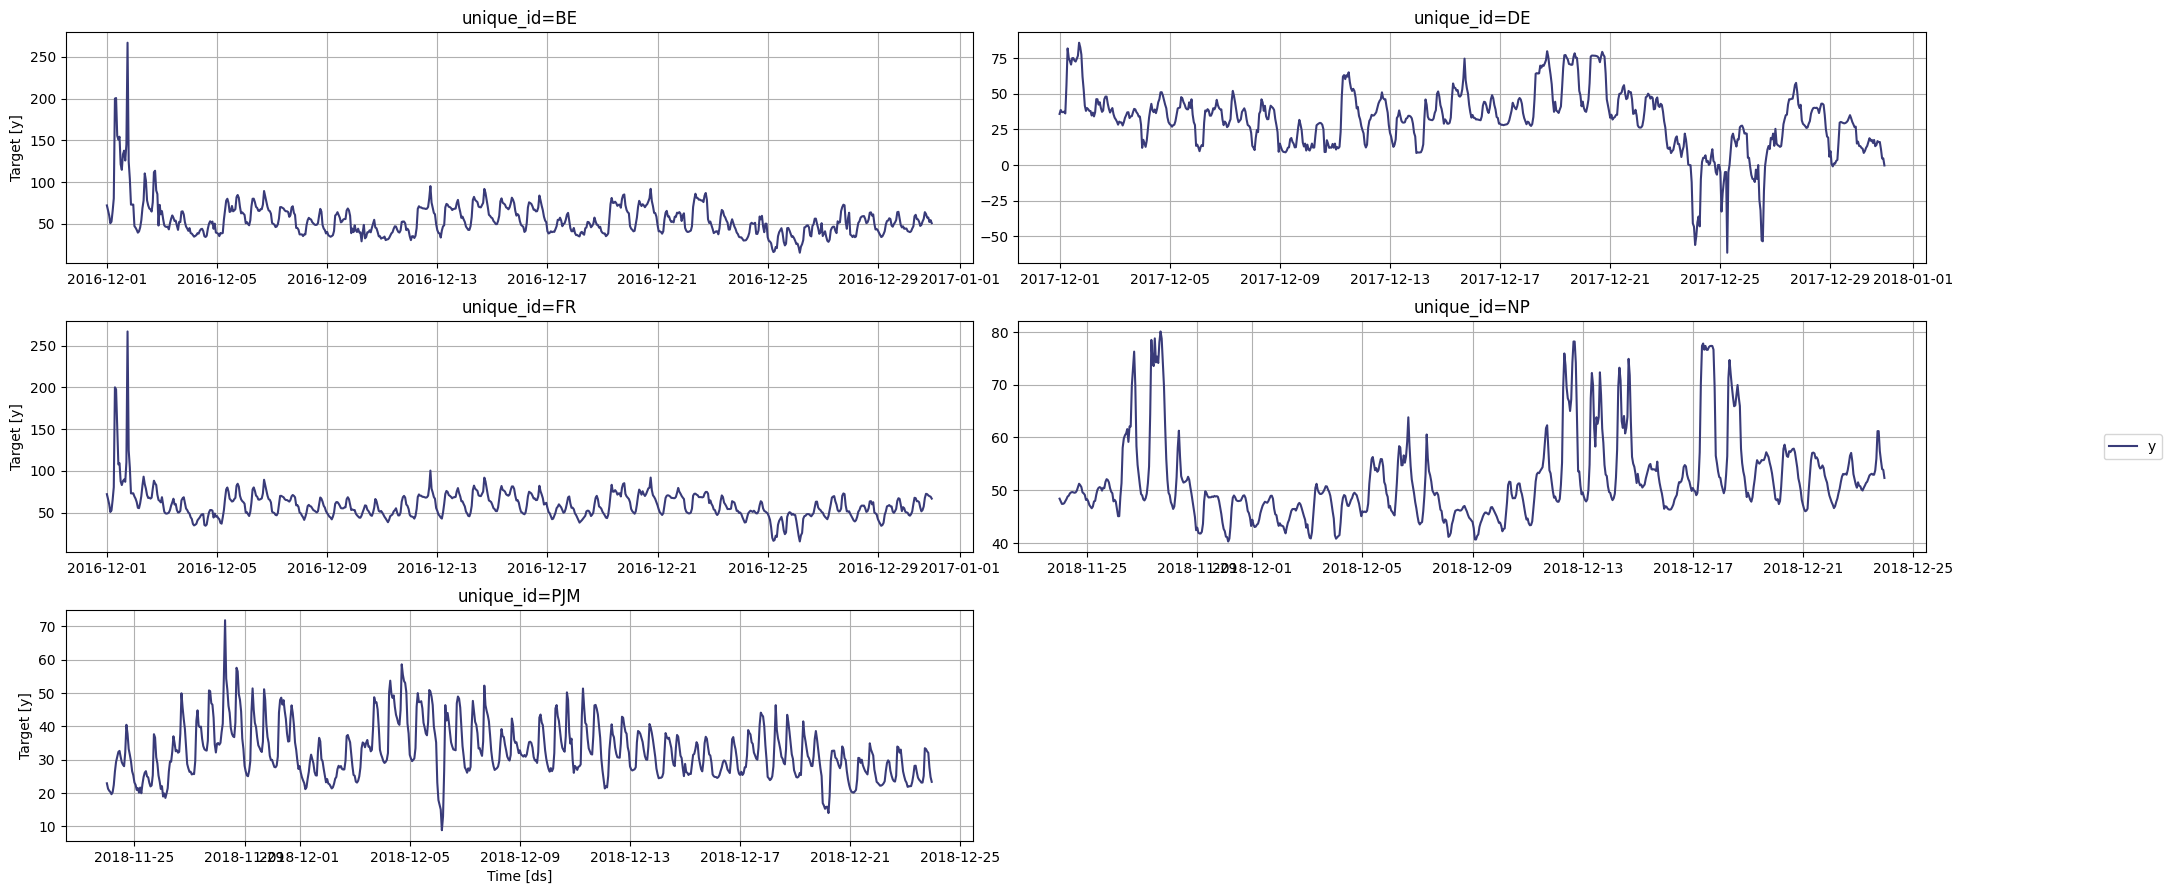

In [8]:
timegpt.plot(df)

We just have to pass the dataframe to create forecasts for all the time series at once.

In [9]:
timegpt_fcst_multiseries_df = timegpt.forecast(df=df, h=24, level=[80, 90])
timegpt_fcst_multiseries_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: h
INFO:nixtlats.timegpt:Restricting input...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,unique_id,ds,TimeGPT,TimeGPT-lo-90,TimeGPT-lo-80,TimeGPT-hi-80,TimeGPT-hi-90
0,BE,2016-12-31 00:00:00,52.352974,40.420174,50.208540,54.497408,64.285774
1,BE,2016-12-31 01:00:00,51.997952,36.978392,46.358701,57.637202,67.017511
2,BE,2016-12-31 02:00:00,52.144554,36.933457,47.332140,56.956968,67.355651
3,BE,2016-12-31 03:00:00,52.567665,40.084767,50.250374,54.884956,65.050563
4,BE,2016-12-31 04:00:00,53.285229,39.602031,49.890355,56.680103,66.968427


> BEFORE: *15 API Calls | 392830 Tokens | 615.06 Spent*  
> AFTER: *16 API Calls | 393910 Tokens | 617.56 Spent*  
> **USAGE: 1 API Call | 1080 Tokens | 2.50 Spent**

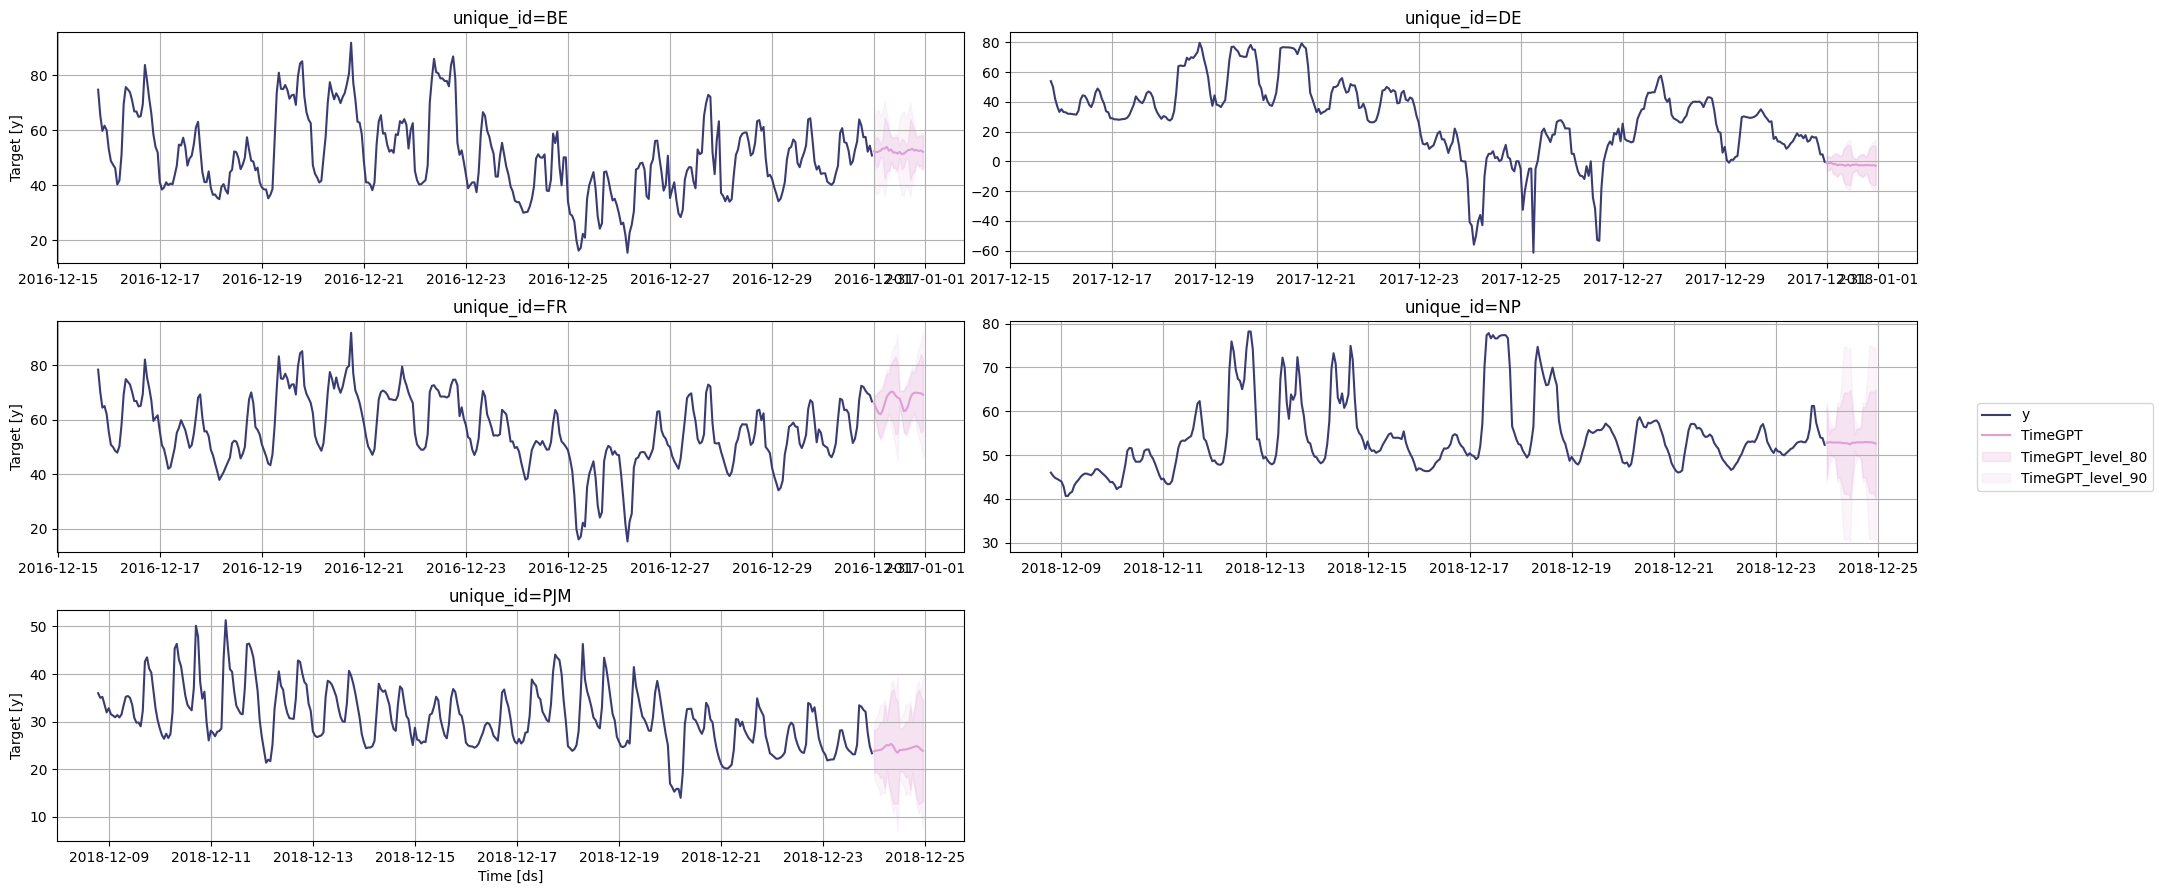

In [10]:
timegpt.plot(df, timegpt_fcst_multiseries_df, max_insample_length=365, level=[80, 90])

#### Historical forecast

You can also compute prediction intervals for historical forecasts adding the `add_history=True` parameter as follows:

In [11]:
timegpt_fcst_multiseries_with_history_df = timegpt.forecast(
    df=df, h=24, level=[80, 90], add_history=True
)
timegpt_fcst_multiseries_with_history_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Inferred freq: h
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...


,unique_id,ds,TimeGPT,TimeGPT-lo-80,TimeGPT-lo-90,TimeGPT-hi-80,TimeGPT-hi-90
0,BE,2016-12-02 00:00:00,80.935654,64.465560,59.796517,97.405748,102.074791
1,BE,2016-12-02 01:00:00,84.188507,67.718413,63.049370,100.658601,105.327644
2,BE,2016-12-02 02:00:00,82.693245,66.223151,61.554108,99.163339,103.832382
3,BE,2016-12-02 03:00:00,81.324753,64.854659,60.185616,97.794847,102.463890
4,BE,2016-12-02 04:00:00,85.677780,69.207686,64.538643,102.147874,106.816917


> BEFORE: *16 API Calls | 393910 Tokens | 617.56 Spent*  
> AFTER: *18 API Calls | 422590 Tokens | 694.94 Spent*  
> **USAGE: 2 API Calls | 28680 Tokens | 77.38 Spent**

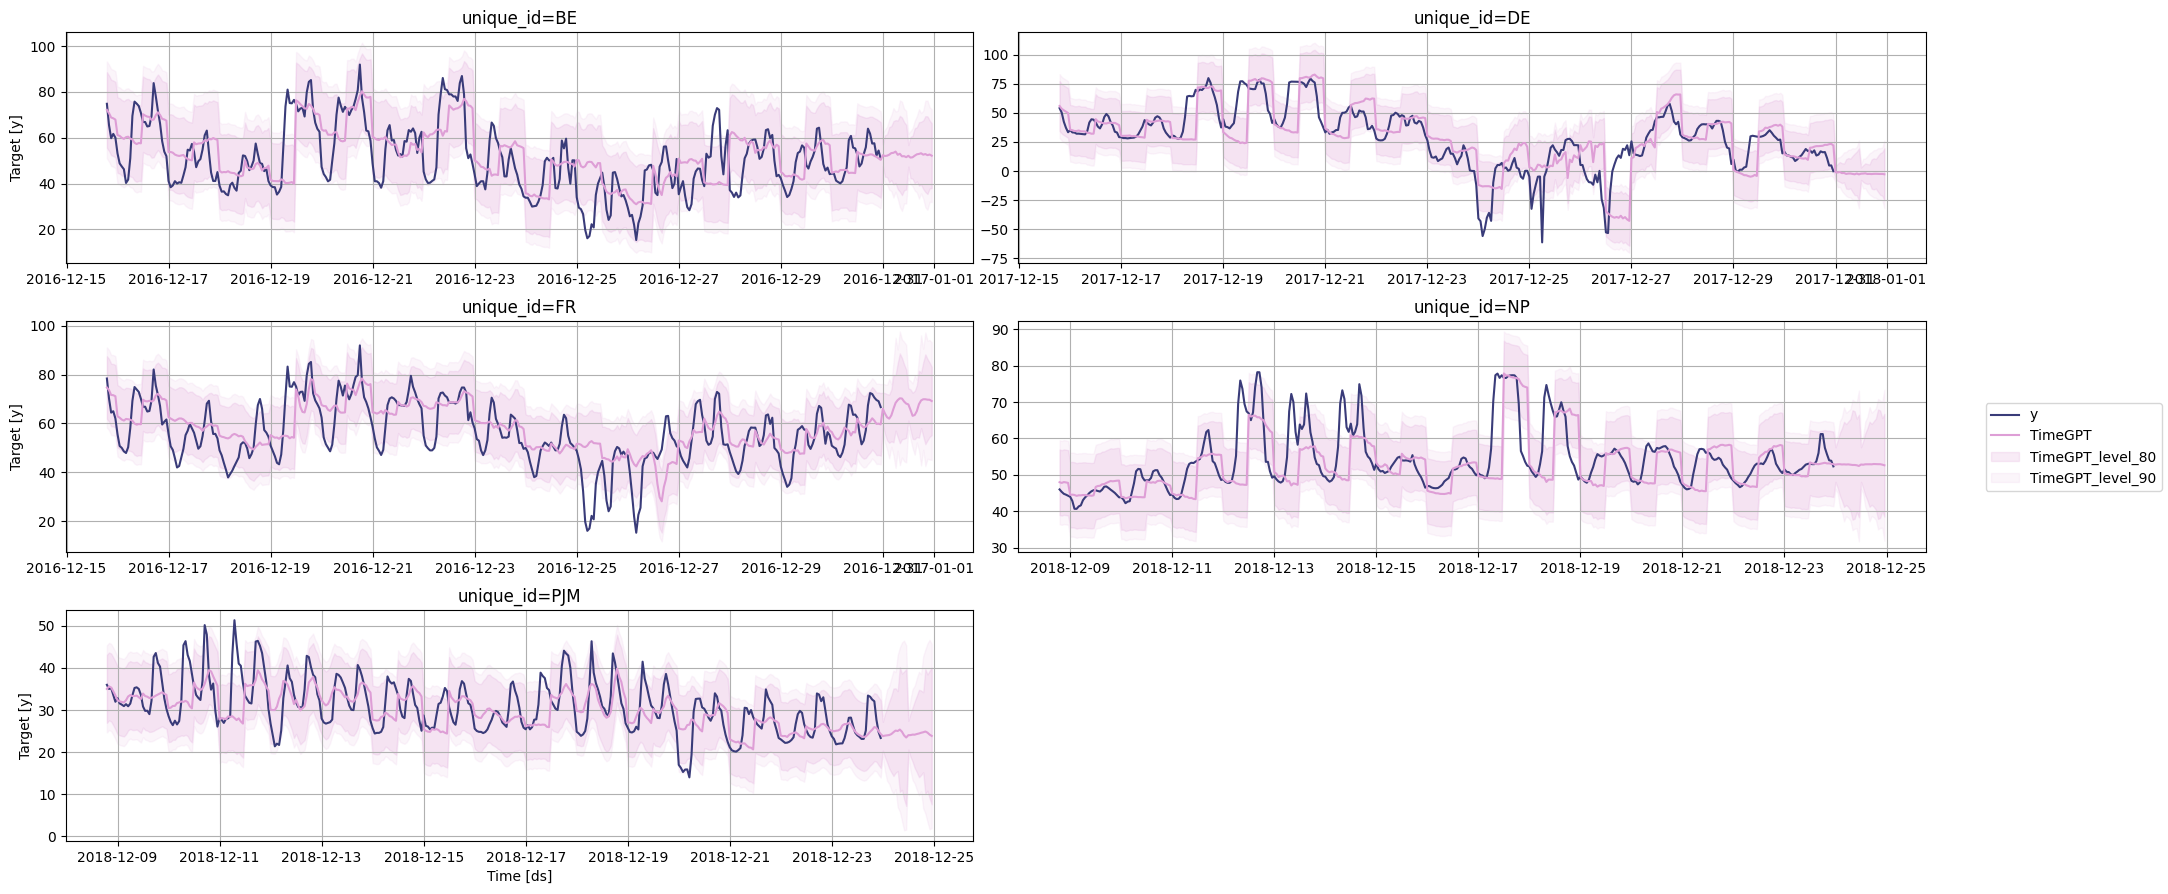

In [12]:
timegpt.plot(
    df,
    timegpt_fcst_multiseries_with_history_df.groupby("unique_id").tail(365 + 24),
    max_insample_length=365,
    level=[80, 90],
)